## How to keep a Telco Customer

by Chloe Whitaker 2021-11-29

### Project Introduction

#### Project Goal

Our goal is to identify the drivers of churn at Telco and the likelihood
that a current customer will churn, so that we can develop custom solutions that increase retention. 

#### Project Description

Here at Telco, keeping customers is an issue. Our churn rates have become much to high, and it's time to dig into why. 

A huge expense for telecommunication companies is aquiring new customers. If telecommunication companies like ours can retain current customers, they can save on the cost of aquisition. 

In this project we will look at factors that contribute to customers churnning or not churnning. By identifiying the drivers of churn, we will then develop a model to predict how likely a future customer is to churn or not. We will also recommend tailored solutions to keep customers happy and with the company. Keeping customers = saving money, and we can help telecommunication companies do both. 

#### Initial Questions

1. What month are customers most likely to churn in?    
2. Are customers with a certain service type more or less likely to churn? 
    - Specifically are customers with fiber more likely to churn? 
3. Do the customers that churn have a higher monthly cost than those that do not churn? 
4. Do the customers that churn use paperless billing more or less than those who don't?

#### Data Dictionary

| Variable | Meaning |
| --- | --- |
| senior_citizen | 'Yes': 1, 'No': 0 if they are a senior citizen |
| partner | 'Yes': 1, 'No': 0 if they have a partner on their contract|
| dependents| 'Yes': 1, 'No': 0 if they have dependents on their contract|
| tenure | the number of months a customer has been with the company|
| phone_servive | 'Yes': 1, 'No': 0 if they have phone service|
| multiple_lines | 'Yes': 1, 'No': 0 if they have multiple lines|
| online_security | 'Yes': 1, 'No': 0 if they have online security|
|online_backup|'Yes': 1, 'No': 0 if they have online backup |
|device_protection|'Yes': 1, 'No': 0 if they have device protection |
|tech_support| 'Yes': 1, 'No': 0 if they have tech support|
|streaming_tv| 'Yes': 1, 'No': 0 if they have tv streaming|
|streaming_movies|'Yes': 1, 'No': 0 if they have movie streaming|
|paperless_billing|'Yes': 1, 'No': 0 if they have paperless billing |
|monthly_charges| customer's monthly bill| 
|total_charges  |total of monthly bills during customer's tenure |
|churn|'Yes': 1, 'No': 0 if they have churned |
|contract_type| one year, two year, or month-to-month|
|internet_service_type | dsl, fiber optic, or no service|
|payment_type | mailed check, electronic check, credit card (automatic), bank transfer (automatic) |
|is_autopay| yes if payment_type contains 'automatic' |
|contract_type_month_to_month| yes or no |
|contract_type_one_year|yes or no  |
|contract_type_two_year|yes or no  |
|internet_service_type_DSL|yes or no  |
|internet_service_type_fiber_optic |yes or no  |
|internet_service_type_None|yes or no  |
|payment_type_bank_transfer_auto|yes or no  |
|payment_type_credit_card_auto| yes or no |
|payment_type_electronic_check|yes or no  | 
|payment_type_mailed_check| yes or no | 



#### Imports Necessary for this project

In [144]:
import acquire_telco
import prepare_telco

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 
import math

from pydataset import data

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

### Aquire the Telco Data

We will aquire the telco data from the Codeup SQL database using a function stored in acquire_telco.py.

In [5]:
# import acquire_telco.py
import acquire_telco

In [6]:
# acquire
df = acquire_telco.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


### Wrangle the Telco Data

Here we will prepare the data using functions stored in prepare_telco.py. 
We are going to use this data to develop a model, therefore we need to make sure there are no incompatible datatypes, and we are left with only clean columns that are useful. We will also need to split the data into train, validate, test so that we can test the accuracy of our model. 

We will run the clean_split_telco_data function that runs both the wrangle_telco and the train_validate_test_split functions. 

The wrangle_telco data will do the following:
- remove duplicates
- drop whitespaces
- drop the columns that don't seem useful: 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', and 'gender'
- converts 'total_charges' from and object to a float
- converts the binary categorical variables to numeric: 'tenure', 'churn', 'partner', 'dependents', 'paperless_billing', 'phone_service', 'multiple_lines', 'online_security', 'streaming_movies', 'streaming_tv', 'online_backup', 'device_protection', 'tech_support', 'is_autopay'
- gets dummies from non-binary object varibales 
- concatenate dummy dataframe to original 
- returns the cleaned df

The train_validate_test_split function will do the following: 

- takes in a dataframe (df) and returns 3 dfs (train, validate, and test) split 20%, 24%, 56% respectively 
- takes in a random seed for replicating results

In [7]:
# import prepare_telco.py
import prepare_telco

In [8]:
# run functions from prepare_teco.py to prepare and split the data
train, validate, test = prepare_telco.clean_split_telco_data(df)

In [9]:
train.shape

(3937, 30)

In [10]:
validate.shape

(1688, 30)

In [11]:
test.shape

(1407, 30)

In [12]:
# verify the df we brought in is what we want
train.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,...,contract_type_month_to_month,contract_type_one_year,contract_type_two_year,internet_service_type_DSL,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_auto,payment_type_credit_card_auto,payment_type_electronic_check,payment_type_mailed_check
6096,0,1,0,70,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1603,0,1,1,15,1,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
5350,1,1,0,52,1,1,1,1,1,0,...,1,0,0,0,1,0,0,0,1,0
2068,0,0,0,39,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
6366,0,1,0,32,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [13]:
# check that datatypes are all compatible for modeling
train.dtypes

senior_citizen                         int64
partner                                int64
dependents                             int64
tenure                                 int64
phone_service                          int64
multiple_lines                         int64
online_security                        int64
online_backup                          int64
device_protection                      int64
tech_support                           int64
streaming_tv                           int64
streaming_movies                       int64
paperless_billing                      int64
monthly_charges                      float64
total_charges                        float64
churn                                  int64
contract_type                         object
internet_service_type                 object
payment_type                          object
is_autopay                              bool
contract_type_month_to_month           uint8
contract_type_one_year                 uint8
contract_t

Before we get to the modeling stage, we will drop the three columns that are 'object' datatypes. This type is not compatible with modeling but will be useful in the exploritory stage. 
Since we have created dummies from these columns we will not need them anymore. 

### Explore the Telco Data

Here we will explore the telco data to find the key drivers of customer churn. 

We will ask some initial questions and and answer thoes questions through visuals, statistics, or both. 

To get an idea of what kind of question might relevent to ask we can look at the makup of each column in the Telco train data:

In [103]:
# for each column in train, print the value counts of each variable
for col in train:
    print(col)
    print(train[col].value_counts())

senior_citizen
0    3290
1     647
Name: senior_citizen, dtype: int64
partner
0    2033
1    1904
Name: partner, dtype: int64
dependents
0    2764
1    1173
Name: dependents, dtype: int64
tenure
1     350
72    202
2     133
3     121
71    107
4     103
5      80
7      75
70     70
8      68
11     66
68     65
9      63
12     63
10     62
13     59
6      59
69     57
67     53
23     53
15     52
24     51
64     50
14     50
18     49
30     48
56     47
61     46
22     45
60     44
62     44
52     44
41     44
16     43
29     43
65     42
35     42
66     41
53     41
19     41
26     41
33     41
46     40
32     40
51     40
27     39
40     39
17     38
55     38
54     37
48     37
50     36
34     36
63     36
57     36
37     36
39     35
43     35
38     35
28     34
21     34
49     34
25     34
47     34
59     33
20     32
31     31
58     31
45     30
36     28
42     26
44     25
Name: tenure, dtype: int64
phone_service
1    3548
0     389
Name: phone_service, dty

Before we can start to run stat tests and create visuals, we need to create variables to make things simpler.

In [62]:
# We know know telco wants to focus on the cause of m2m churn so we will start there
m2m_churn = train[['contract_type']][(train['churn'] == 1)]
m2m_no_churn = train[['contract_type']][(train['churn'] == 0)]

In [137]:
internet_churn = train[['internet_service_type']][(train['churn'] == 1)]
internet_no_churn = train[['internet_service_type']][(train['churn'] == 0)]

In [155]:
paperless_b_churn = train[['paperless_billing']][(train['churn'] == 1)]
paperless_b_no_churn = train[['paperless_billing']][(train['churn'] == 0)]

#### The problem: Churn

Overall churn at Telco is 26.7%

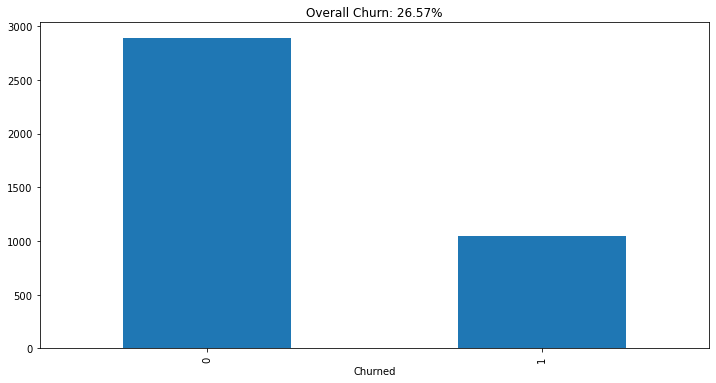

In [288]:
plt.figure(figsize=(12, 6))
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f"Overall Churn: {churn_rate:.2%}")
plt.xlabel('Churned');

Telco recognizes that most of the churn comes from month-to-month contract types. Our company is committed to offering our customers this contract option and need to find other ways to curb churn. 

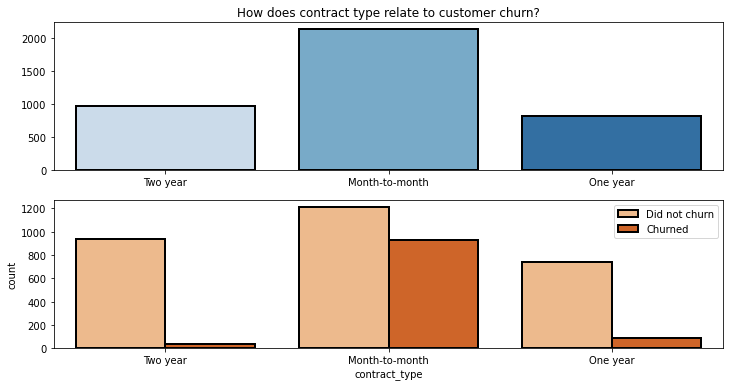

In [287]:
plt.figure(figsize=(12, 6))
plt.subplot(211)

sns.countplot(x = 'contract_type', data=train, palette='Blues', ec='black', linewidth=2)

plt.title('How does contract type relate to customer churn?')
plt.xlabel('')
plt.ylabel('')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'contract_type', hue = 'churn', data=train, palette='Oranges', ec='black', linewidth=2)

plt.legend(['Did not churn', 'Churned'])

plt.show()


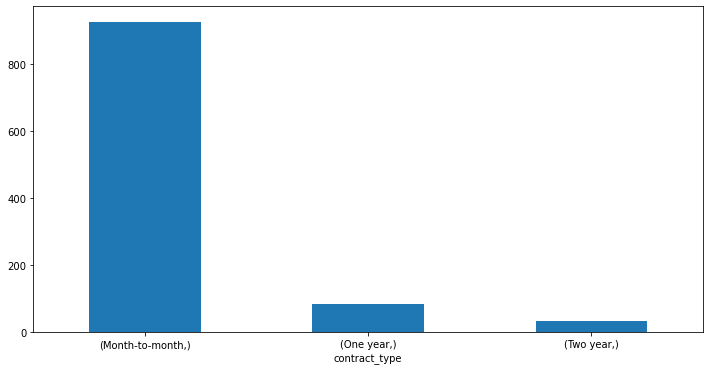

In [286]:
# m2m churn compared to the other contract types
plt.figure(figsize=(12, 6))
m2m_churn.value_counts().plot.bar(rot=0);

Month-2-month churn is 26.57%

1. What month are customers most likely to churn in?  

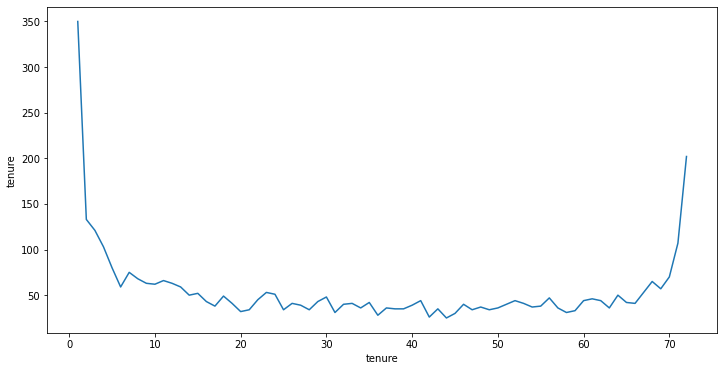

In [291]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=train.groupby(by='tenure')['tenure'].count().index, y=train.groupby(by='tenure')['tenure'].count());


In [83]:
avg_churn = train.groupby('churn').tenure.mean()

avg_churn.head()

churn
0    37.583535
1    18.471319
Name: tenure, dtype: float64

After the first month, the amount of customers that stay decrease significantly, with the average number of months a churning customers stays being 18. 

2. Are customers with a certain service type more or less likely to churn
  - Specifically are customers with fiber more likely to churn? 

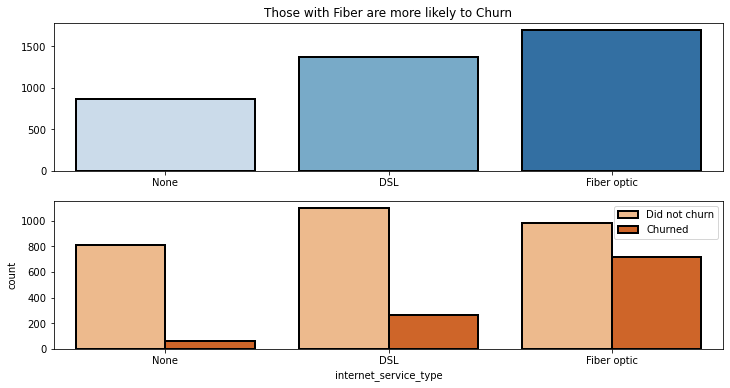

In [285]:
plt.figure(figsize=(12, 6))
plt.subplot(211)

sns.countplot(x = 'internet_service_type', data=train, palette='Blues', ec='black', linewidth=2)

plt.title('Those with Fiber are more likely to Churn')
plt.xlabel('')
plt.ylabel('')

plt.subplot(212)

# use hue to add another dimension to your viz
sns.countplot(x = 'internet_service_type', hue = 'churn', data=train, palette='Oranges', ec='black', linewidth=2)

plt.legend(['Did not churn', 'Churned'])

plt.show()


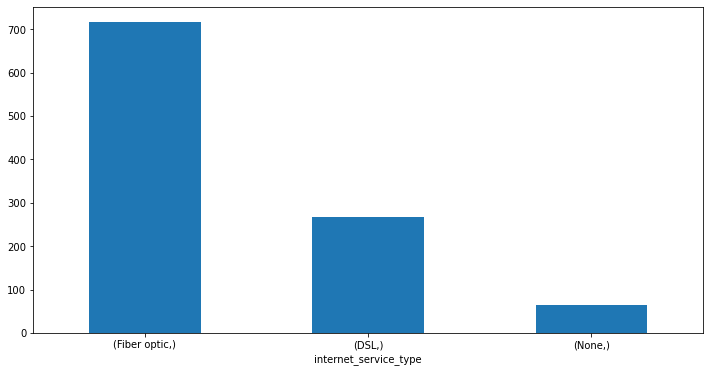

In [282]:
plt.figure(figsize=(12, 6))
internet_churn.value_counts().plot.bar(rot=0);

Through these visuals we can see that fiber customers are more likely to churn than DSL and those without internet. 

Now we will run a Chi2 statistical test to see whether there is a correlation between fiber customers and churn. 

In [128]:
# set alpha to 0.05 to ensure 95% confidence
a = 0.05

Null Hypothesis: A customer churning and having fiber optic internet are independent. 

Alt Hypothesis: A customer churning and having fiber optic internet are dependent.

In [135]:
internet_churn.value_counts()

internet_service_type
Fiber optic              716
DSL                      266
None                      64
dtype: int64

In [139]:
266 + 64

330

In [138]:
internet_no_churn.value_counts()

internet_service_type
DSL                      1102
Fiber optic               982
None                      807
dtype: int64

In [140]:
1102 + 807

1909

In [142]:
observed = pd.DataFrame([[716, 330], [982, 1909]])
observed.index = ['Churn', 'No Churn']
observed.columns = ['Fiber', 'No Fiber']
observed


,Fiber,No Fiber
Churn,716,330
No Churn,982,1909


In [145]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [146]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 716  330]
 [ 982 1909]]
---
Expected

[[ 451  594]
 [1246 1644]]
---

chi^2 = 370.9722
p     = 0.0000


In [147]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


We reject the null hypothesis that a customer churning and having fiber optic internet are independent. 

3. Do the customers that churn have a higher monthly cost than those that do not churn? 

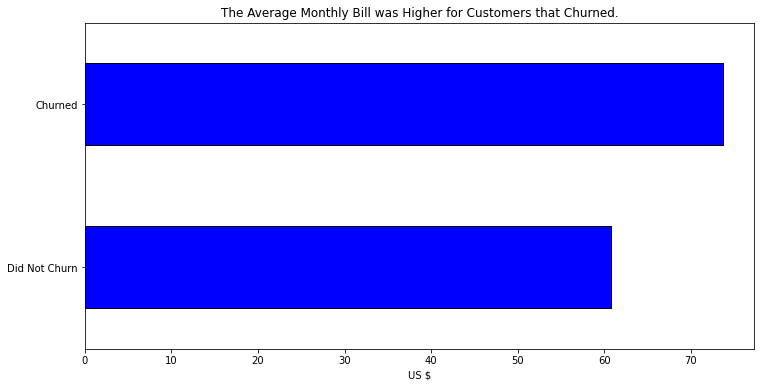

In [278]:
# Plot groupby churn to see average monthly charges comparison

plt.figure(figsize=(12, 6))
train.groupby('churn').monthly_charges.mean().plot(kind='barh', color='blue', ec='black')

plt.title('The Average Monthly Bill was Higher for Customers that Churned.')
locs, labels = plt.yticks()
plt.yticks(locs, ('Did Not Churn', 'Churned'))
plt.ylabel('')
plt.xlabel('US $')

plt.show()

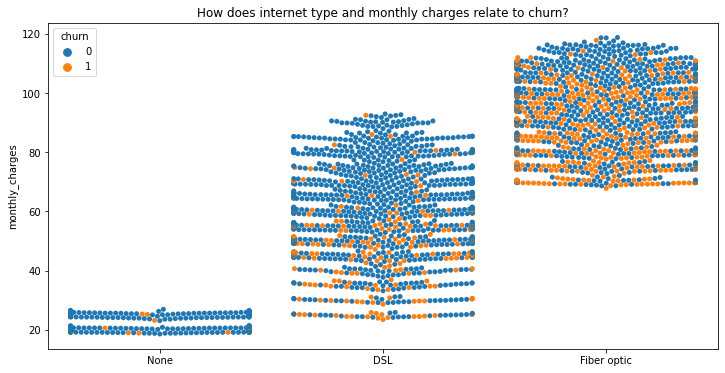

In [97]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='internet_service_type', y='monthly_charges', data=train , hue='churn'  )

plt.title('How does internet type and monthly charges relate to churn?')
plt.xlabel('')
plt.show()

 4. Do the customers that churn use paperless billing more than those who don't?

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

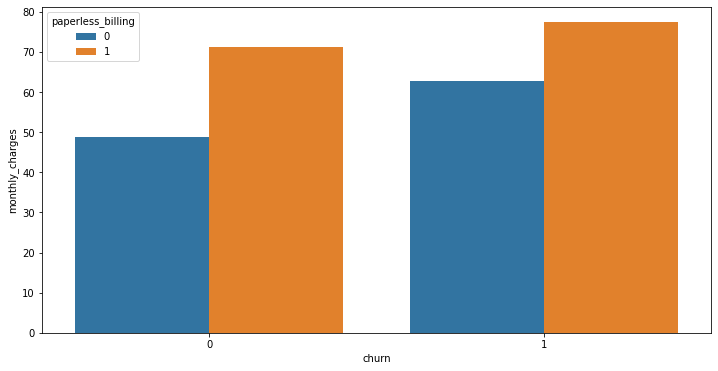

In [277]:
plt.figure(figsize=(12, 6))
sns.barplot(x="churn", y="monthly_charges", data=train, ci=None, hue="paperless_billing")

Through this visual we can see that paperless billing customers are more likely to churn than not. 

Now we will run a Chi2 statistical test to see whether there is a correlation between paperless billing customers and churn. 

In [148]:
# set alpha to 0.05 to ensure 95% confidence
a = 0.05

Null Hypothesis: A customer churning and having paperless billing are independent. 

Alt Hypothesis: A customer churning and having paperless billing are dependent. 

In [157]:
paperless_b_churn.value_counts()

paperless_billing
1                    779
0                    267
dtype: int64

In [158]:
paperless_b_no_churn.value_counts()

paperless_billing
1                    1540
0                    1351
dtype: int64

In [159]:
observed = pd.DataFrame([[779, 267], [1540, 1315]])
observed.index = ['Churn', 'No Churn']
observed.columns = ['Paperless', 'Not Paperless']
observed


,Paperless,Not Paperless
Churn,779,267
No Churn,1540,1315


In [160]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [161]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 779  267]
 [1540 1315]]
---
Expected

[[ 621  424]
 [1697 1157]]
---

chi^2 = 133.0378
p     = 0.0000


In [162]:
if p < a:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


We reject the null hypothesis that a customer churning and having paperless billing are independent.

### Takeaways 

The takeaways from our initial questions are the following: 

- We start losing customers drastically after the fisrt month, and those that churn are most likely to leave in the 18th month. 

- Customers paying for fiber optic internet service are more likely to churn than those who aren't. 

- The reason for this and churn in general seems to be that those who leave have a higher monthly bill than those who stay. 

- The customers that churn that use paperless billing, still pay more per month than those who stay. 

### Modeling to Predict Customer Churn

Before we build our models we need to define our X and Y variables and drop the three categorical features that are left. 

In [170]:
X_train = train.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_train = train[['churn']]

X_validate = validate.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_validate = validate[['churn']]

X_test = test.drop(columns=['churn', 'contract_type', 'internet_service_type', 'payment_type'])
y_test = test[['churn']]


In [171]:
X_train.dtypes

senior_citizen                         int64
partner                                int64
dependents                             int64
tenure                                 int64
phone_service                          int64
multiple_lines                         int64
online_security                        int64
online_backup                          int64
device_protection                      int64
tech_support                           int64
streaming_tv                           int64
streaming_movies                       int64
paperless_billing                      int64
monthly_charges                      float64
total_charges                        float64
is_autopay                              bool
contract_type_month_to_month           uint8
contract_type_one_year                 uint8
contract_type_two_year                 uint8
internet_service_type_DSL              uint8
internet_service_type_fiber_optic      uint8
internet_service_type_None             uint8
payment_ty

In [179]:
y_train.dtypes

churn    int64
dtype: object

#### Establishing the Baseline

The last thing we have to do before fitting (training) out models is establishing a baseline.

In [169]:
train.churn.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

A customer is more likely not to churn than churn, so not churning will be our baseline. 
Our basline accuracy is 73%. 

In [173]:
baseline = y_train.mode()

In [174]:
baseline

,churn
0,0


In [175]:
match_bsl_prediction = y_train == 0

In [176]:
baseline_accuracy = match_bsl_prediction.mean()

In [178]:
# basline accuracy = 73%
baseline_accuracy

churn    0.734315
dtype: float64

#### Three Best Models

#### Decision Tree

In [181]:
tree1_clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [182]:
tree1_clf = tree1_clf.fit(X_train, y_train)

In [184]:
#visualize the decision tree
import graphviz
from graphviz import Graph

dot_data = export_graphviz(tree1_clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)

'telco_decision_tree.pdf'

In [188]:
y_pred = tree1_clf.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [189]:
y_pred_proba = tree1_clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.97229219, 0.02770781],
       [0.77721088, 0.22278912],
       [0.58823529, 0.41176471],
       [0.77721088, 0.22278912],
       [0.97229219, 0.02770781]])

In [193]:
# accuracy:
print('Accuracy of Decision Tree 1 classifier on training set: {:.2f}'
      .format(tree1_clf.score(X_train, y_train)))

Accuracy of Decision Tree 1 classifier on training set: 0.79


In [194]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2719,172
1,643,403


In [195]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.39      0.50      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



In [196]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.808745,0.700870,0.79299,0.754807,0.780084
recall,0.940505,0.385277,0.79299,0.662891,0.792990
f1-score,0.869663,0.497224,0.79299,0.683443,0.770711
support,2891.000000,1046.000000,0.79299,3937.000000,3937.000000


In [197]:
# If not churn (0) is our positive case
TP = 2719
FP = 172
FN = 643
TN = 403
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7929895859791719
True Positive Rate: 0.8087447947650208
False Positive Rate: 0.2991304347826087
True Negative Rate: 0.7008695652173913
False Negative Rate: 0.1912552052349792
Precision: 0.9405050155655482
Recall: 0.8087447947650208
F1 Score: 0.8696625619702542
Support (0): 3362
Support (1): 575


In [223]:
# Test accuravy on out of sample data
rf1_clf.score(X_validate, y_validate)

0.7950236966824644

In [224]:
# Want to find the difference to make sure there is not overfitting 
train_accuracy = rf1_clf.score(X_train, y_train)
validate_accuracy = rf1_clf.score(X_validate, y_validate)

In [227]:
# Threshold is under 0.1, so we don't have to worry about overfitting
difference = train_accuracy - validate_accuracy
difference

0.06121201578896052

#### Random Forest

In [201]:
# create model with max_depth of 11 and min_samples_leaf of 5
rf1_clf = RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=123)

In [200]:
rf1_clf

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=123)

In [202]:
# Fit the model 
rf1_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=5, random_state=123)

In [209]:
# See how the features are being weighted
print(rf1_clf.feature_importances_)

[0.0165038  0.01136759 0.00932857 0.1569365  0.00874393 0.01146359
 0.03342219 0.01325022 0.00972432 0.02184425 0.01147449 0.01221934
 0.02045287 0.12769189 0.14534649 0.01316372 0.1136016  0.02539448
 0.04271456 0.0214629  0.07508704 0.026175   0.00624926 0.00742334
 0.05029983 0.00865825]


In [210]:
# predict the accuracy
y_pred = rf1_clf.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [205]:
y_pred_proba = rf1_clf.predict_proba(X_train)

In [206]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1_clf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.86


In [208]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2718,173
1,393,653


In [213]:
#print the classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2891
           1       0.79      0.62      0.70      1046

    accuracy                           0.86      3937
   macro avg       0.83      0.78      0.80      3937
weighted avg       0.85      0.86      0.85      3937



In [215]:
class_report = classification_report(y_train, y_pred, output_dict=(True))
print("rf1_clf depth")
pd.DataFrame(class_report)

rf1_clf depth


,0,1,accuracy,macro avg,weighted avg
precision,0.873674,0.790557,0.856236,0.832115,0.851591
recall,0.940159,0.624283,0.856236,0.782221,0.856236
f1-score,0.905698,0.697650,0.856236,0.801674,0.850423
support,2891.000000,1046.000000,0.856236,3937.000000,3937.000000


In [214]:
# If not churned is our positive case
TP = 2718
FP = 173
FN = 393
TN = 653
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8562357124714249
True Positive Rate: 0.8736740597878495
False Positive Rate: 0.20944309927360774
True Negative Rate: 0.7905569007263923
False Negative Rate: 0.12632594021215043
Precision: 0.940159114493255
Recall: 0.8736740597878495
F1 Score: 0.9056981006331223
Support (0): 3111
Support (1): 826


In [221]:
# Test accuravy on out of sample data
rf1_clf.score(X_validate, y_validate)

0.7950236966824644

In [220]:
# Want to find the difference to make sure there is not overfitting 
train_accuracy = rf1_clf.score(X_train, y_train)
validate_accuracy = rf1_clf.score(X_validate, y_validate)

In [228]:
# Threshold is under 0.1, so we don't have to worry about overfitting
difference = train_accuracy - validate_accuracy
difference

0.06121201578896052

#### Logistic Regression

In [234]:
# All features and c=9
logit1 = LogisticRegression(C=9, random_state=123)

logit1.fit(X_train, y_train)

y_pred = logit1.predict(X_train)

accuracy = logit1.score(X_train, y_train)

print("All Features and we're setting c to 9")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting c to 9
Accuracy of Logistic Regression classifier on training set: 0.81


In [235]:
 logit1.score(X_validate, y_validate)

0.7902843601895735

In [236]:
train_accuracy = logit1.score(X_train, y_train)
validate_accuracy = logit1.score(X_validate, y_validate)

In [237]:
difference = train_accuracy - validate_accuracy
difference

0.014897250173647292

In [240]:
# Using probability to predict churn
y_pred_proba = logit1.predict_proba(X_train)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['no churn', 'churn'])
y_pred_proba.head()

,no churn,churn
0,0.995488,0.004512
1,0.766656,0.233344
2,0.527249,0.472751
3,0.737489,0.262511
4,0.977315,0.022685


#### Select the Best Model For the Project

Even though the random tree model's accuracy on out of sample data was slightly better than the logistic regression model on the validate sample, we are going to use the logistic regression model because it is a better fit for this project. 

This project will ultimately be pitched to Telco's C-level executives and needs to be easily explainable. 

#### Testing the final model on the test data

Now that we have chosen the logistic regression model, we can test it on our test data sample. 

Final model accuracy: 81%

Baseline Accuracy: 73%

Improved accuracy by 8%

In [292]:
model = logit1.score(X_test, y_test)

In [253]:
model

0.8102345415778252

In [268]:
# predict the accuracy
y_pred = logit1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [269]:
y_pred_proba = logit1.predict_proba(X_test)

In [270]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(logit1.score(X_test, y_test)))

Accuracy of random forest classifier on training set: 0.81


In [271]:
# Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,922,111
1,156,218


In [272]:
# Classification Report
class_report = classification_report(y_test, y_pred, output_dict=(True))
print("logit1 depth")
pd.DataFrame(class_report)

logit1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.855288,0.662614,0.810235,0.758951,0.804072
recall,0.892546,0.582888,0.810235,0.737717,0.810235
f1-score,0.873520,0.620199,0.810235,0.746859,0.806184
support,1033.000000,374.000000,0.810235,1407.000000,1407.000000


In [273]:
# Using probability to predict churn
y_pred_proba = logit1.predict_proba(X_test)


y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['no churn', 'churn'])
y_pred_proba.head()

,no churn,churn
0,0.926783,0.073217
1,0.922295,0.077705
2,0.945202,0.054798
3,0.996732,0.003268
4,0.975869,0.024131


### Write Model Predictions to CSV

In [293]:
# This writes our predictions from our LR model to a CSV 
proba_test = logit1.predict_proba(X_test)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['no churn', 'churn'])
y_pred_proba.head()

reset_test = test.reset_index()

reset_test.head()

# concatenate these values together into a dataframe to write to CSV
test_proba_df = pd.concat([reset_test, y_pred_proba], axis=1)
test_proba_df.head()

test_proba_df['predicted'] = logit1.predict(X_test)
test_proba_df.head(20)


# create a probability table to a csv called predictions (1=churn, 0=not_churn)
test_proba_df.to_csv('test_predictions.csv')

### Project Conclusion 

#### Summary

In this project we found a correlation between customers with a higher monthly bill and those that churn. 

Fiber optic internet is one of the main places Telco is hemeraging customers and once again, it seems to correlate to cost.  

We have also developed a logistic regression model that can predict whether a future customer will churn or not with 81% accuracy. 


#### Recommendations

In addition to the effort to lower fiber costs through bundling or other means, it would also be a smart solution to create an easy to use portal where customers can see their monthly bill and add and drop features to tailor their services to their needs and budget. Customers could alos use this portal to automatically their bill. 

Although our current model is beating baseline predictions by 8%, with more time we can adjust the features and hyperpameters to tune the model  to better predict future churn. 